# 데이터 수집

### 필요 라이브러리 설치

In [2]:
!pip install -U finance-datareader

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.1 kB/s eta 0:00:00
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/89.0 kB ? eta -:--:--
   ---------------------------------------- 89.0/89.0 kB 2.5 MB/s eta 0:00:00
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.4/3.8 MB 8.5 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/3.8 MB 13.0 MB/s eta 0:00:01


In [5]:
!pip install bs4

   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB 660.6 kB/s eta 0:00:27
   - -------------------------------------- 0.5/17.3 MB 6.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/17.3 MB 14.4 MB/s eta 0:00:02
   ------- -------------------------------- 3.3/17.3 MB 19.3 MB/s eta 0:00:01
   ----------- ---------------------------- 4.9/17.3 MB 22.4 MB/s eta 0:00:01
   --------------- ------------------------ 6.9/17.3 MB 26.0 MB/s eta 0:00:01
   -------------------- ------------------- 8.8/17.3 MB 28.1 MB/s eta 0:00:01
   ------------------------ --------------- 10.7/17.3 MB 36.4 MB/s eta 0:00:01
   ----------------------------- ---------- 12.8/17.3 MB 40.9 MB/s eta 0:00:01
   ----------------------------------- ---- 15.2/17.3 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------  17.3/17.3 MB 40.9 MB/s eta 0:00:0

   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/147.9 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/147.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 147.9/147.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib

### 필요 라이브러리 import

In [2]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

### 삼성전자 주가 가져오기

In [37]:
df = fdr.DataReader('005930', '2014-07-01', '2024-07-26').loc[:,'Close']
df

Date
2014-07-01    26200
2014-07-02    26600
2014-07-03    26360
2014-07-04    26120
2014-07-07    25840
              ...  
2024-07-22    83000
2024-07-23    83900
2024-07-24    82000
2024-07-25    80400
2024-07-26    80900
Name: Close, Length: 2479, dtype: int64

In [35]:
# 기간 필터링
demands = df.loc[(df.index >= '2023-01-01') & (df.index <= '2024-02-14')]
demands.info()
demands

test_demands = df.loc[(df.index >= '2024-02-15') & (df.index <= '2024-02-28')]
test_demands.info()
test_demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 275 entries, 2023-01-02 to 2024-02-14
Series name: Close
Non-Null Count  Dtype
--------------  -----
275 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2024-02-15 to 2024-02-28
Series name: Close
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


Date
2024-02-15    73000
2024-02-16    72800
2024-02-19    73800
2024-02-20    73300
2024-02-21    73000
2024-02-22    73100
2024-02-23    72900
2024-02-26    72800
2024-02-27    72900
2024-02-28    73200
Name: Close, dtype: int64

### 전처리

In [ ]:
# min max
# https://wikidocs.net/173005 2-2. 데이터 전처리 - MinMaxScaler 2-4. 훈련 데이터와 테스트 데이터를 분리

### Moving average 구하기

In [47]:
demands.head(10)

Date
2023-01-02    55500
2023-01-03    55400
2023-01-04    57800
2023-01-05    58200
2023-01-06    59000
2023-01-09    60700
2023-01-10    60400
2023-01-11    60500
2023-01-12    60500
2023-01-13    60800
Name: Close, dtype: int64

In [46]:
# rolling https://wikidocs.net/152788

ma3 = demands.rolling(window=3, min_periods=1).mean()
print(ma3)
ma20 = demands.rolling(window=20, min_periods=1).mean()
ma60 = demands.rolling(window=60, min_periods=1).mean()

Date
2023-01-02    55500.000000
2023-01-03    55450.000000
2023-01-04    56233.333333
2023-01-05    57133.333333
2023-01-06    58333.333333
                  ...     
2024-02-06    74633.333333
2024-02-07    74566.666667
2024-02-08    74500.000000
2024-02-13    74766.666667
2024-02-14    74433.333333
Name: Close, Length: 275, dtype: float64


### 시각화

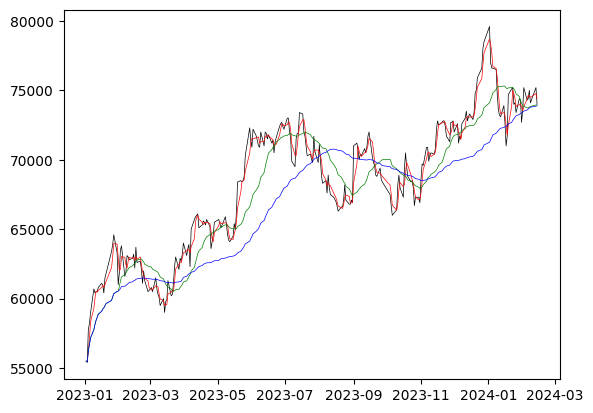

In [16]:
import matplotlib.pyplot as plt

plt.plot(demands, label='actual', linestyle='solid', color='black', linewidth=0.5)
plt.plot(ma3, label='ma3', linestyle='solid', color='red', linewidth=0.5)
plt.plot(ma20, label='ma20', linestyle='solid', color='green', linewidth=0.5)
plt.plot(ma60, label='ma60', linestyle='solid', color='blue', linewidth=0.5)

plt.show()

###  10일 (test_demand) 예측해보기

In [17]:
# ma3로 예측
window_size = 3
windows = demands.tail(window_size).values
predicts = []
for i in range(len(test_demands)):
    p = np.mean(windows[-3:])
    predicts.append(int(p))
    windows = np.append(windows, p)
print(f'predicts: {predicts}')
print(f'test_demands: {test_demands.to_list()}')

predicts: [74433, 74544, 74325, 74434, 74434, 74398, 74422, 74418, 74413, 74418]
test_demands: [73000, 72800, 73800, 73300, 73000, 73100, 72900, 72800, 72900, 73200]


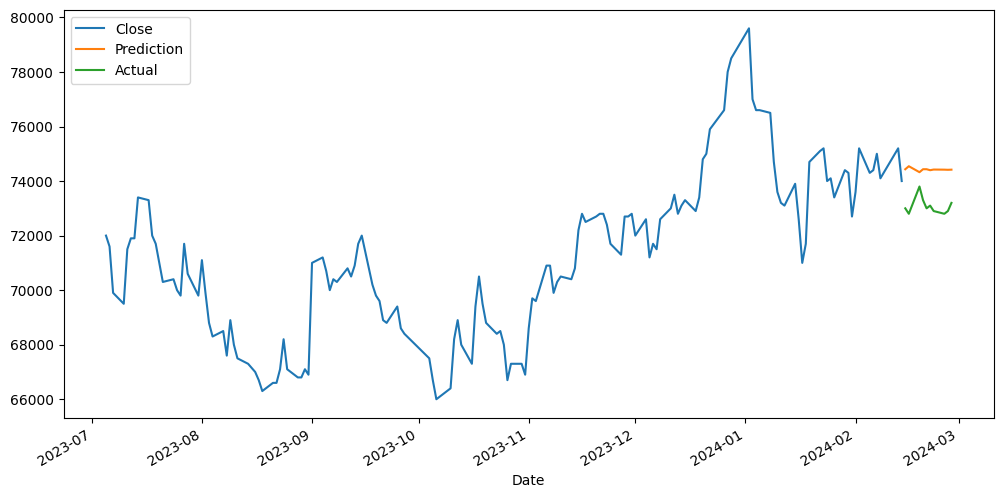

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(150).plot(ax =ax)
ax.plot(test_demands.index, predicts, label='Prediction')
ax.plot(test_demands.index, test_demands.to_list(), label='Actual')
ax.legend(loc='upper left')
plt.show()

### 평가

In [23]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

print('MSE:', MSE(predicts, test_demands.to_list()))
print('MAE:', MAE(predicts, test_demands.to_list()))

MSE: 1910486.7
MAE: 1343.9


1. MA의 평가방법
오늘 계산 값은 내일의 예측값 (20일 ma 값 -> 21일 act 값과 비교)

2. 지표
https://rfriend.tistory.com/667
MSE, MAE

In [19]:

for z in zip(demands[1:].to_list(), ma3[:-1].to_list()):
    print(z)

(55400, 55500.0)
(57800, 55450.0)
(58200, 56233.333333333336)
(59000, 57133.333333333336)
(60700, 58333.333333333336)
(60400, 59300.0)
(60500, 60033.333333333336)
(60500, 60533.333333333336)
(60800, 60466.666666666664)
(61100, 60600.0)
(61000, 60800.0)
(60400, 60966.666666666664)
(61500, 60833.333333333336)
(61800, 60966.666666666664)
(63400, 61233.333333333336)
(63900, 62233.333333333336)
(64600, 63033.333333333336)
(63300, 63966.666666666664)
(61000, 63933.333333333336)
(61800, 62966.666666666664)
(63500, 62033.333333333336)
(63800, 62100.0)
(61600, 63033.333333333336)
(61900, 62966.666666666664)
(63100, 62433.333333333336)
(63000, 62200.0)
(62800, 62666.666666666664)
(62900, 62966.666666666664)
(63200, 62900.0)
(62200, 62966.666666666664)
(63700, 62766.666666666664)
(62600, 63033.333333333336)
(62700, 62833.333333333336)
(62100, 63000.0)
(61100, 62466.666666666664)
(62000, 61966.666666666664)
(61300, 61733.333333333336)
(60500, 61466.666666666664)
(60600, 61266.666666666664)
(60800,

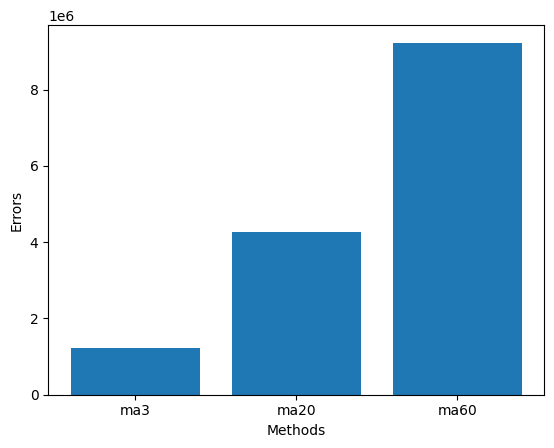

In [20]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

y = [
MSE(demands[1:].to_list(), ma3[:-1].to_list()),
MSE(demands[1:].to_list(), ma20[:-1].to_list()),
MSE(demands[1:].to_list(), ma60[:-1].to_list())]

# y2 = [
# MAE(demands[1:].to_list(), ma3[:-1].to_list()),
# MAE(demands[1:].to_list(), ma20[:-1].to_list()),
# MAE(demands[1:].to_list(), ma60[:-1].to_list())]

plt.bar(['ma3', 'ma20', 'ma60'], y)
# plt.bar(['ma3', 'ma20', 'ma60'], y2)
plt.xlabel('Methods')
plt.ylabel('Errors')
plt.show()